In [ ]:
# get_ipython().system('pip install beautifulsoup4')

In [ ]:
# get_ipython().system('pip install selenium')

In [ ]:
# get_ipython().system('pip install lxml')

In [ ]:
# get_ipython().system('pip install html5lib')

In [ ]:
# parser : DOM의 형태로 만들기 위한 것

In [1]:
from bs4 import BeautifulSoup
import lxml

In [2]:
html = '''
<html>
    <head>
        <title>예제</title>
    </head>
    <body>
        <div>
            <p>
                <a href='/page' class='d' id=ljh>페이지 이동</a>
                <a>페이지 이동1</a>
            </p>
        </div>
        <footer>
            <a class='d'>페이지 이동3</a>
        </footer>
    </body>
</html>
'''

In [3]:
# # 일부러 구조 망가뜨림
html = '''
<html>
    <head>
        <title>예제</title>
    </head>
    <body>
        <div>
            <p>
                <a href='/page' class='d' id=ljh>페이지 이동</a>
        </div>
            </p>
        <footer>
            <a class='d'>페이지 이동3</a>
        </footer>
    </body>
</html>
'''

In [4]:
# dom = BeautifulSoup(html, 'html.parser')
dom = BeautifulSoup(html, 'lxml')

In [5]:
dom # dom 객체들 node 하나씩 출력

<html>
<head>
<title>예제</title>
</head>
<body>
<div>
<p>
<a class="d" href="/page" id="ljh">페이지 이동</a>
</p></div>
<footer>
<a class="d">페이지 이동3</a>
</footer>
</body>
</html>

In [6]:
dom.text

'\n\n예제\n\n\n\n\n페이지 이동\n\n\n페이지 이동3\n\n\n\n'

In [7]:
print(dom.prettify())

<html>
 <head>
  <title>
   예제
  </title>
 </head>
 <body>
  <div>
   <p>
    <a class="d" href="/page" id="ljh">
     페이지 이동
    </a>
   </p>
  </div>
  <footer>
   <a class="d">
    페이지 이동3
   </a>
  </footer>
 </body>
</html>



In [8]:
dom.html # 자식 요소

<html>
<head>
<title>예제</title>
</head>
<body>
<div>
<p>
<a class="d" href="/page" id="ljh">페이지 이동</a>
</p></div>
<footer>
<a class="d">페이지 이동3</a>
</footer>
</body>
</html>

In [9]:
dom.html.head.title.text

'예제'

In [10]:
dom.title.text

'예제'

In [11]:
dom.body.text, dom.p, dom.a  # dom.a : 모든 anchor tag x

('\n\n\n페이지 이동\n\n\n페이지 이동3\n\n',
 <p>
 <a class="d" href="/page" id="ljh">페이지 이동</a>
 </p>,
 <a class="d" href="/page" id="ljh">페이지 이동</a>)

In [12]:
list(dom.body.children)

['\n',
 <div>
 <p>
 <a class="d" href="/page" id="ljh">페이지 이동</a>
 </p></div>,
 '\n',
 <footer>
 <a class="d">페이지 이동3</a>
 </footer>,
 '\n']

In [ ]:
for _ in list(dom.body.children):
    print(_, type(_))

In [ ]:
dom.a.attrs, dom.a['href']

In [ ]:
list(dom.body.div.p.children)

In [ ]:
dir(dom.body.div.p.children)

In [ ]:
for _ in list(dom.body.div.p.children):
    if _.has_attr('class'):
        print(_['class'])

In [ ]:
dom.asdfasdfa, type(dom.asdfasdfa) # nonetype이더라도 error x ㅡㅡ

In [ ]:
dom.a['href'], dom.a == None, dom.asdfasdfa == None

In [ ]:
# 1. 없는 태그(노드) 못 거름 -> nonetype 객체 -> warning
# 2. 특정 노드 -> 첫음에 나온 노드 하나만

In [ ]:
dom.find()

In [ ]:
dom.find('a'), dom.find('a')['href']

In [ ]:
dom.find('a').attrs

In [ ]:
dom.find_all('a'), dom.find_all('a')[-1]

In [ ]:
# 찾고 싶은 tag 나열
len(dom.find_all({'p', 'a'})), dom.find_all({'p', 'a'})

In [ ]:
dom.find_all({'p', 'a'})

In [ ]:
# id값만
dom.find_all('a'), dom.find_all('a', {'id':'ljh'})

In [ ]:
dom.find_all(text='페이지 이동1') ## ?

In [ ]:
dom.find_all('a', limit=2) # limit : 자손 중 몇 개 까지 찾을것인지

In [ ]:
dom.find_all(attrs={'class':'d'}), dom.find_all('a',
                                                attrs={'class':'d'})

In [ ]:
## recursive : 조상 레벨까지 or 부모 레벨까지

In [ ]:
dom.find_all('a'), dom.find_all('a', attrs={'class':'d'})

In [ ]:
dom.footer.find_all('a')

In [ ]:
dom.div.find_all('a')

In [ ]:
node = dom.footer.a; type(node), node.attrs # bs4.element.Tag : 제대로 가져옴

In [ ]:
node.find_parent(), node.find_parent().name

In [ ]:
for _ in node.find_parents():
    print(_.name)

In [ ]:
for _ in node.find_parents(limit=2):
    print(_.name)

In [ ]:
dom.div.find_all() # 모든 자손 출력

In [ ]:
for _ in dom.div.find_all():
    print(_.name)

In [ ]:
for _ in dom.div.find_all(recursive=False):
    print(_.name)

In [ ]:
node.find_parent().find_parent().find('a')

In [ ]:
node.find_parent().find_parent().find().find('a').find_next_sibling() #?

In [5]:
import requests
from urllib.robotparser import RobotFileParser
from requests.compat import urlparse, urljoin
from requests.exceptions import HTTPError
import time

In [4]:
def canfetch(url, agent='*', path='/'):
    robot = RobotFileParser(urljoin(url, '/robots.txt'))
    robot.read()
    return robot.can_fetch(agent, urlparse(url)[2])

def download(url, params={}, headers={}, method='GET', limit=3):
    if canfetch(url) == False:
        print('[Error] ' + url)
#     else:
    try:
        resp = requests.request(method, url,
               params=params if method=='GET' else {},
               data=params if method=='POST' else {},
               headers=headers)
        resp.raise_for_status()
    except HTTPError as e:
        if limit > 0 and e.response.status_code >= 500:
            print(limit)
            time.sleep(1) # => random
            resp = download(url, params, headers, method, limit-1)
        else:
            print('[{}] '.format(e.response.status_code) + url)
            print(e.response.status_code)
            print(e.response.reason)
            print(e.response.headers)
    return resp

In [ ]:
resp = download('http://pythonscraping.com/pages/page3.html')
dom = BeautifulSoup(resp.content, 'lxml')

In [ ]:
node = dom.find('div', {'id':'footer'}) # start point

In [ ]:
node

In [ ]:
for _ in node.find_parents():
    print(_.name)

In [ ]:
node.find_parents('div')[0]

In [ ]:
len(node.find_parents('div'))

In [ ]:
node.find_parents('div')[0].find_all(recursive=False)[0]

In [ ]:
node.find_parents('div')[0].find_all(recursive=False)[0]['src'] # 주소값만

In [ ]:
for _ in node.find_previous_siblings():
    print(_.name)

In [ ]:
node.find_previous_siblings()[-1]['src']

In [ ]:
# '../img/gifts/logo.jpg' : ..은 상대주소를 의미! / 상대주소

In [ ]:
resp.request.url

In [ ]:
urljoin(resp.request.url, node.find_previous_siblings()[-1]['src'])

In [ ]:
node.find_previous_siblings('table')

In [ ]:
node.find_previous_siblings('table')[0].find_all(recursive=False) # 자식 호출

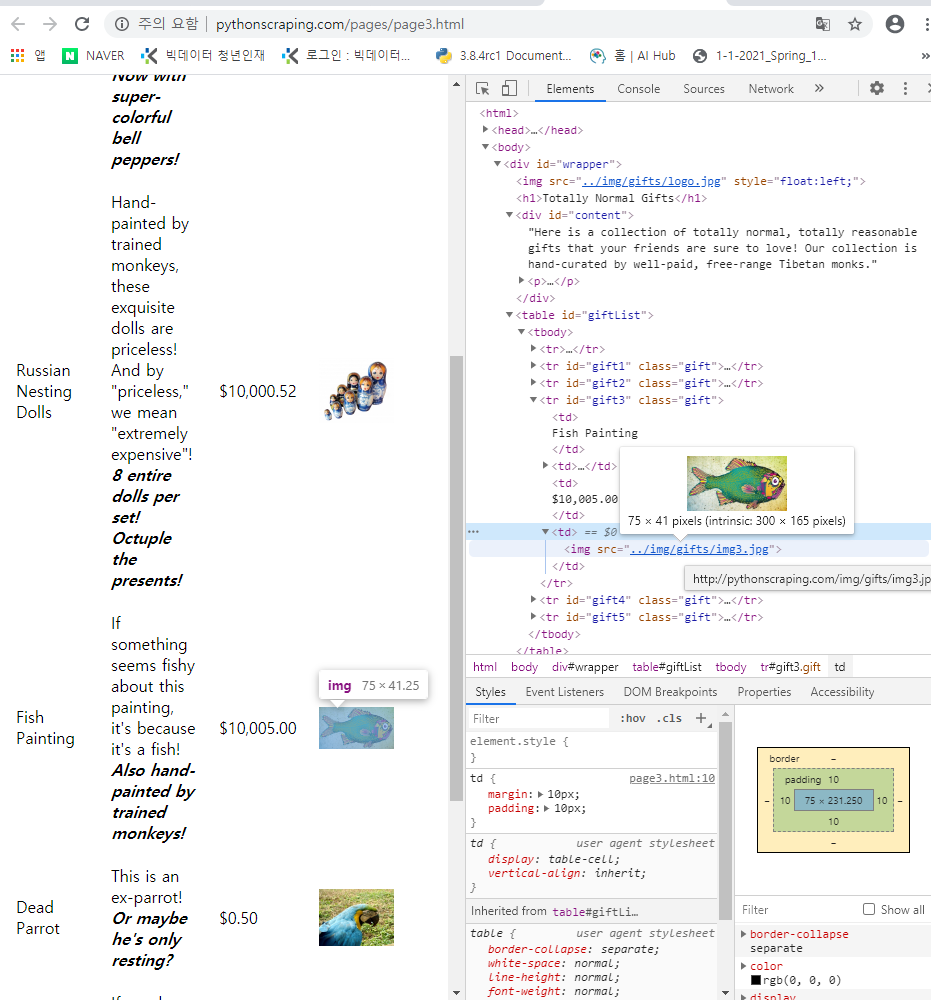

In [ ]:
# 3번째 물고기 부분
node.find_previous_siblings('table')[0].find_all(recursive=False)[3]\
.find('img')['src']

In [ ]:
for _ in dom.find('table').find_all(recursive=False)[1:]:
    print(_.find_all('td', recursive=False)[2].text.strip())

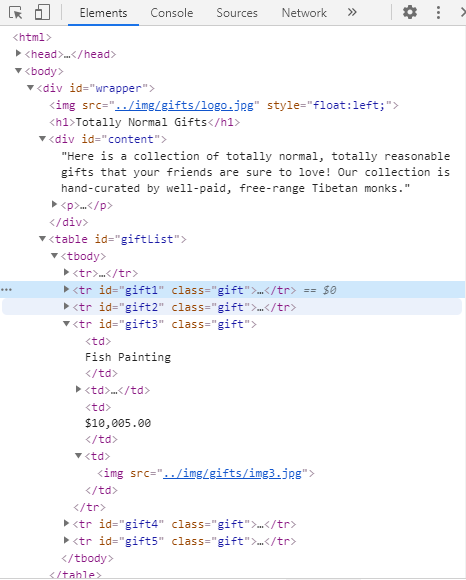

In [ ]:
for _ in dom.find_all(attrs={'class':'gift'}):
    print([td.text.strip() for td in _.find_all()])

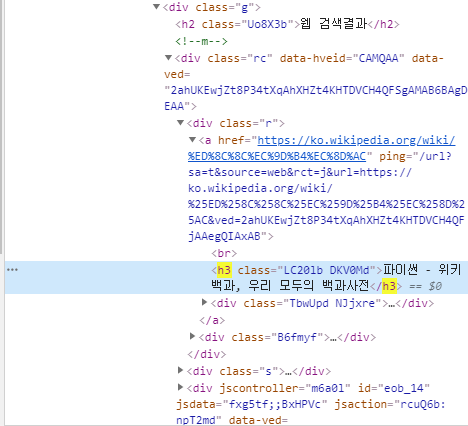

In [6]:
from bs4 import BeautifulSoup
import lxml
import requests
from urllib.robotparser import RobotFileParser
from requests.compat import urlparse, urljoin
from requests.exceptions import HTTPError
import time

In [7]:
from html import escape, unescape

In [8]:
## 구글 파이썬 검색결과에서 제목들만 가져오기

url = 'https://www.google.com/search'
params = {
    'q':'',
    'oq':'',
    'aqs':'chrome..69i57j69i59j69i65l3j69i61j69i60j69i61.1205j0j7',
    'sourceid':'chrome',
    'ie':'UTF-8'
}
params['q'] = params['oq'] = '파이썬'
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')

[Error] https://www.google.com/search


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><meta content="origin" name="referrer"/><title>파이썬 - Google 검색</title><script nonce="sEG8SKDLsedKg/PssB7iHw==">(function(){window.google={kEI:'92kSX5KEHOOumAWnp6HwDw',kEXPI:'31',kBL:'dOFG'};google.sn='web';google.kHL='ko';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var c;a&&(!a.getAttribute||!(c=a.getAttribute("eid")));)a=a.parentNode;return c||google.kEI};google.getLEI=function(a){for(var c=null;a&&(!a.getAttribute||!(c=a.getAttribute("leid")));)a=a.parentNode;return c};google.ml=function(){return null};google.time=function(){return Date.now()};google.log=function(a,c,b,d,g){if(b=google.logUrl(a,c,b,d,g)){a=new Image;var e=google.lc,f=google.li;e[f]=a;a.onerror=a.onload=a.onabort=function(){delete e[f]};google.vel&&google.vel.lu&&google.vel.lu(b);a.src=b;google.li=f+1}
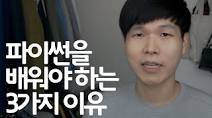
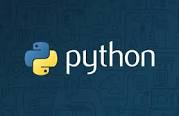
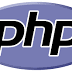
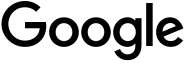

In [28]:
dom

In [10]:
resp.request.headers # header에 따라 서버에서 응답하는 것이 다르다

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [29]:
dom.find_all('h3', {'class': 'LC201b'})

[]

In [21]:
for _ in dom.find_all('a', {'class':'LC201b'}):
    print(_.text)

In [22]:
# 'a' 부모 클래스
for _ in dom.find_all('h3', {'class': 'LC201b'}):
    print(_.find_parents(limit=2)[-1])
    print(_.find_parents(limit=2)[-1].attrs)

In [23]:
[(_.text.strip(), _.find_parents('a')[0]['href'])
 for _ in dom.find_all('h3', {'class': 'LC201b'})]

[]

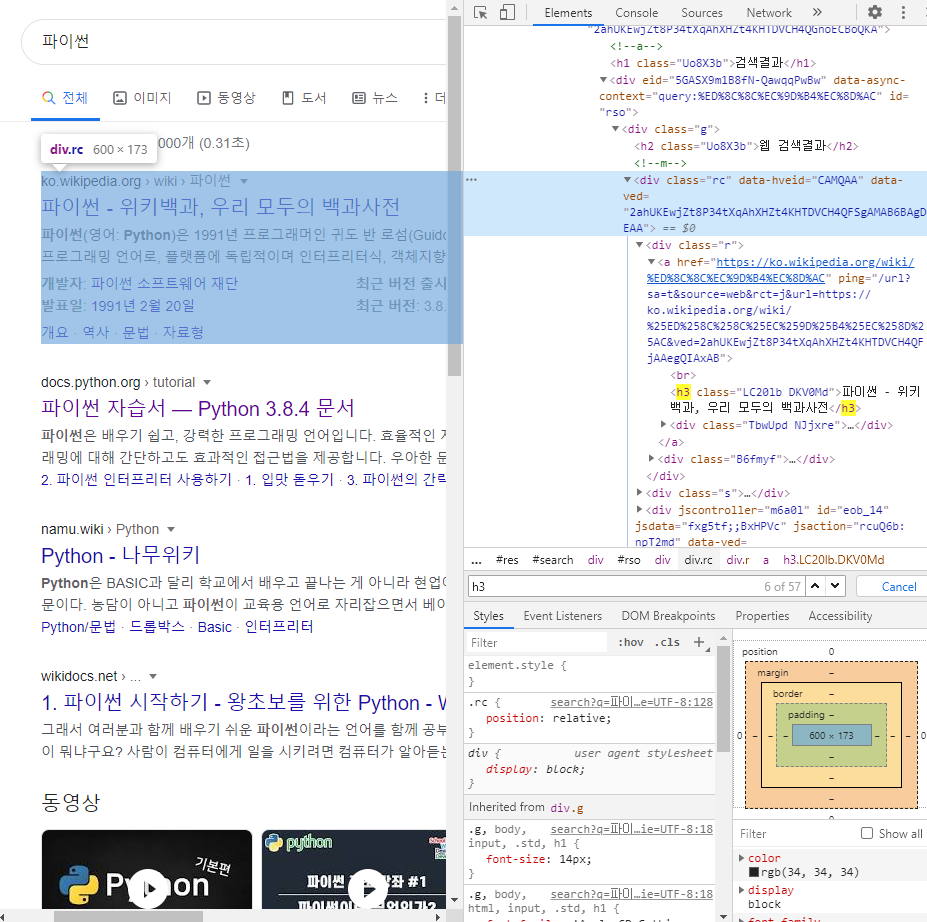

In [24]:
# 위에서부터 경로로 접근하기 
len(dom.find_all('div', {'class':'rc'})) 

8

In [25]:
for _ in dom.find_all('div', {'class':'rc'}):
    print(_.find().find('a')['href'])
    print(_.find('a').find('h3').text.strip())

https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬 - 위키백과, 우리 모두의 백과사전
https://docs.python.org/ko/3/tutorial/index.html
파이썬 자습서 — Python 3.8.4 문서
https://namu.wiki/w/Python
Python - 나무위키
https://wikidocs.net/43
1. 파이썬 시작하기 - 왕초보를 위한 Python - WikiDocs
http://pythonstudy.xyz/python/article/6-Python-%EC%BD%94%EB%94%A9%EC%9D%98-%EA%B8%B0%EC%B4%88
Python 코딩의 기초 - 예제로 배우는 파이썬 프로그래밍
https://www.inflearn.com/course/%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EA%B8%B0%EB%B3%B8
파이썬 무료 강의 (기본편) - 6시간 뒤면 나도 개발자 - 인프런
https://dojang.io/mod/page/view.php?id=2153
파이썬 코딩 도장: 1.3 파이썬
https://byline.network/2020/03/17-90/
파이썬의 인기는 언제까지 갈까? - Byline Network


In [6]:
from bs4 import BeautifulSoup
import lxml
import requests
from urllib.robotparser import RobotFileParser
from requests.compat import urlparse, urljoin
from requests.exceptions import HTTPError
import time

In [7]:
from requests import request
from requests.compat import urljoin, urlparse
from requests.exceptions import HTTPError
from urllib.robotparser import RobotFileParser
from bs4 import BeautifulSoup
from time import sleep

In [8]:
def canfetch(url, agent='*', path='/'):
    robot = RobotFileParser(urljoin(url, '/robots.txt'))
    robot.read()
    return robot.can_fetch(agent, urlparse(url)[2])
    
def download(url, params={}, headers={}, method='GET', limit=3):
    if canfetch(url) == False:
        print('[Error] ' + url)
#     else: # 실제 수집할 때, 제약사항이 많으므로 여기선 잠시 해제
    try:
        resp = request(method, url,
               params=params if method=='GET' else {},
               data=params if method=='POST' else {},
               headers=headers)
        resp.raise_for_status()
    except HTTPError as e:
        if limit > 0 and e.response.status_code >= 500:
            print(limit)
            time.sleep(1) # => random
            resp = download(url, params, headers, method, limit-1)
        else:
            print('[{}] '.format(e.response.status_code) + url)
            print(e.response.status_code)
            print(e.response.reason)
            print(e.response.headers)
    return resp

In [12]:
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}

In [38]:
url = 'https://search.naver.com/search.naver'
params = {
    'sm':'top_hty',
    'fbm':0,
    'ie':'utf8',
    'query':''
}
params['query'] = '파 이 썬'
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.content, 'html.parser')

[Error] https://search.naver.com/search.naver


In [39]:
for _ in dom.find_all('ul', {'class': 'type01'}):
    for a in [dt.find('a') for dt in _.find_all('dt')]:
        print(a['href'], a.text)

https://www.python.org/ Welcome to Python.org
https://blog.naver.com/icd900/221318575090 국산 중형차 추천 흰 파 썬
https://blog.naver.com/sanaiauction/221407173464 2015년형 그랜저HG 240모던 흰파썬 소개합니다!
https://blog.naver.com/xmflxhs8568?Redirect=Log&logNo=221532773930 레인보우 썬팅 전면,측.후면 12% 파.썬 30%
https://blog.naver.com/choyooney?Redirect=Log&logNo=221408338615 늦잠,티타임,GA과제,파에썬
https://blog.naver.com/sanaiauction?Redirect=Log&logNo=221407173464 2015년형 그랜저HG 240모던 흰파썬 소개합니다!
https://blog.naver.com/va85hgnmvcl?Redirect=Log&logNo=221687347280 [미얀마 만달레이 호텔] 썬 파 트래블 & 투어 인접한 더...
https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=10402&docId=357557482&qb=7YyMIOydtCDsjaw=&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0  파이썬 if 문에서 and로 연결하는 방법 
https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=10402&docId=342332721&qb=7YyMIOydtCDsjaw=&enc=utf8§ion=kin&rank=2&search_sort=0&spq=0  파이썬 질문 ㅜㅜㅜ 
https://kin.naver.com/qna/detail.nhn?d1id=13&dirId=1303010501&docId=36135662&qb=7YyMIOydtCDsjaw=&enc=utf8§ion=kin&rank=3&search_

In [41]:
for _ in dom.select('.type01 dt > a'):
    print(_['href'], _.text.strip())

https://www.python.org/ Welcome to Python.org
https://papago.naver.net/website?source=en&target=ko&url=https://www.python.org/ 
https://blog.naver.com/icd900/221318575090 국산 중형차 추천 흰 파 썬
https://blog.naver.com/sanaiauction/221407173464 2015년형 그랜저HG 240모던 흰파썬 소개합니다!
https://blog.naver.com/xmflxhs8568?Redirect=Log&logNo=221532773930 레인보우 썬팅 전면,측.후면 12% 파.썬 30%
https://blog.naver.com/choyooney?Redirect=Log&logNo=221408338615 늦잠,티타임,GA과제,파에썬
https://blog.naver.com/sanaiauction?Redirect=Log&logNo=221407173464 2015년형 그랜저HG 240모던 흰파썬 소개합니다!
https://blog.naver.com/va85hgnmvcl?Redirect=Log&logNo=221687347280 [미얀마 만달레이 호텔] 썬 파 트래블 & 투어 인접한 더...
https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=10402&docId=357557482&qb=7YyMIOydtCDsjaw=&enc=utf8§ion=kin&rank=1&search_sort=0&spq=0 파이썬 if 문에서 and로 연결하는 방법
https://kin.naver.com/qna/detail.nhn?d1id=1&dirId=10402&docId=342332721&qb=7YyMIOydtCDsjaw=&enc=utf8§ion=kin&rank=2&search_sort=0&spq=0 파이썬 질문 ㅜㅜㅜ
https://kin.naver.com/qna/detail.nhn?d1id=13&dirId

In [15]:
url = 'https://search.daum.net/search'
params = {
    'w':'tot',
    'DA':'YZR',
    't__nil_searchbox':'btn',
    'sug':'',
    'sugo':'',
    'sq':'',
    'o':'',
    'q':''
}
params['q'] = '파 이 썬'
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')

[Error] https://search.daum.net/search


In [16]:
len(dom.find_all('ul', {'class':'list_info mg_cont clear'}))

7

In [17]:
for _ in dom.find_all('div', {'class': 'wrap_tit'}):
    print(_.find('a')['href'], _.find('a').text.strip())

https://keyword.ad.daum.net/short/clk?q=WQ8cp9UfF3TnsNpqNiyH6aF47W2jvC4CzY.xmbsa-H7qJVetFkYpRw5ZexW2u2wBTc7Of5mUNJujAf1nHSMM_s92QJG2VsnIcyhFkN23ZZtVRyU5qb6dRps2.wvRSoNHFszj9D8hqftH6.H6i3ZC.aip6Bsd4gd6XnHhbfBoFsjaV_amx_8GzCbk-bVYQ-626667cruvTdmBKMIF_bOyYyyToYCDF34djuVi3v5N15mdYmrkQjD-ewQe7Ix4GcJa2k-6oe2_QPhr8FatfCZMZCu5Qa-brG2RZ6RnGDADdkfeaswr2VOOwxGCRSs5NOSKes90&s=http%3A%2F%2Ftjoeun.co.kr%2Ffront%2Flecture%2Fit_course.asp%3Futm_source%3Ddaum%26utm_medium%3Dcpc%26utm_campaign%3Dpremiumlink%26utm_content%3Dcontent%26DMKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMSKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMCOL%3DPM 더조은컴퓨터아카데미 공식
https://keyword.ad.daum.net/short/clk?q=WRKuF2FJItNaLGkv7c3U-u7mzZQp_qMnAyHAt_6rUtHj31UNct_m9A2tZWGTL6EIk5l-F98rNWeiKl1strLCm4yognef1GDvDz-n6bHpBQkPM7N.3PMjppCNN3QrKZOMy_q1_D7ZZoBdvYOynOmVtYJxPy3bpKZRmWdOrPXZgSgUbYFg6uf9jJN_XeXsEODD.s_9LLPcg_NSqPXflMmA._tue5tW7Nfg32uwmr_tR6_r2dyCcjwYkFYcwBl-GUFX1oDBAoiTgb6k_9EzaCMl24Uv6BNce-MbJqlMH_OGPo4VQCY

In [19]:
resp = download('http://pythonscraping.com/pages/page3.html')
dom = BeautifulSoup(resp.content, 'lxml')

In [ ]:
## css selector ( comma seperate)
tag, #id, .class, .class.class.class
tag,tag,tag => CS
tag[id-=asdf] => CS

In [20]:
dom.select_one('div#footer') == dom.select_one('#footer')

True

In [22]:
dom.select_one('#footer').text.strip()

'© Totally Normal Gifts, Inc. \n+234 (617) 863-0736'

In [ ]:
tag1, tag2 
tag tag2 -> 자손 .find_all(recursive=True)
tag1 > tag2 -> 자식 .find_all(recursive=False)
tag1 + tag2 => 형제 (다음 노드) -> tag2 찾을 때 사용하는 방법

In [24]:
dom.select_one('#footer').find_parent().name

'div'

In [27]:
len(dom.select('#wrapper > div')), len(dom.select('#wrapper > *')) 

(2, 5)

In [28]:
[_.name for _ in dom.select('#wrapper > *')]

['img', 'h1', 'div', 'table', 'div']

In [30]:
dom.select_one('h1 + div').name

'div'

In [31]:
dom.select_one('h1 + div').find_previous_sibling().name

'h1'

In [32]:
dom.select_one('body > div > h1 + div').name

'div'

In [36]:
[_.text.strip() for _ in dom.select('.gift > td:nth-of-type(3)')]

['$15.00', '$10,000.52', '$10,005.00', '$0.50', '$1.50']

In [37]:
[_['src'].strip()
 for _ in dom.select('.gift > td > img')]

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [43]:
url = 'http://example.webscraping.com/places/default/index'
resp = download(url)
dom = BeautifulSoup(resp.content, 'html.parser')

In [44]:
for _ in dom.select('a'):
    print(_['href']) # '#' : 피해아 하는 것

#
/places/default/user/register?_next=/places/default/index
/places/default/user/login?_next=/places/default/index
/places/default/index
/places/default/search
/places/default/view/Afghanistan-1
/places/default/view/Aland-Islands-2
/places/default/view/Albania-3
/places/default/view/Algeria-4
/places/default/view/American-Samoa-5
/places/default/view/Andorra-6
/places/default/view/Angola-7
/places/default/view/Anguilla-8
/places/default/view/Antarctica-9
/places/default/view/Antigua-and-Barbuda-10
/places/default/index/1


In [45]:
url = 'http://example.webscraping.com//places/default/view/Afghanistan-1'
resp = download(url)
dom = BeautifulSoup(resp.content, 'html.parser')

for _ in dom.select('a'):
    print(_['href']) # '#' : 피해아 하는 것

#
/places/default/user/register?_next=/places/default/view/Afghanistan-1
/places/default/user/login?_next=/places/default/view/Afghanistan-1
/places/default/index
/places/default/search
/places/default/continent/AS
/places/default/iso/TM
/places/default/iso/CN
/places/default/iso/IR
/places/default/iso/TJ
/places/default/iso/PK
/places/default/iso/UZ
/places/default/edit/Afghanistan-1


In [ ]:
# urls.pop() : 꺼냄 , urls.append() : 추가
# 자료 구조
# Queue : 선입선출(FIFO) -> pop(0) : 처음 요소 추출
# Stack : LIFO -> pop(-1) : 마지막 요소 추출

In [53]:
## 조그마한 사이트임에도 불구, url이 엄청 많은 것을 확인
urls = list()
seen = list() # 방문했었는지
urls.append(url)

while urls: # Queue
    seed = urls.pop(0) # starting url
    seen.append(seed) # 재방문 회피
    dom = BeautifulSoup(download(seed).text, 'html.parser') # http request
    for _ in dom.select('a'): # extract hyperlinks
        if _.has_attr('href'): # 나중에 : 주소 있는지
            if _['href'].startswith('/'): # filter
                newUrls = urljoin(seed, _['href']) # Normalization
                if newUrls not in seen and newUrls not in urls:
                    urls.append(newUrls)
#                     print(newUrls)
    print(len(urls), len(seen))

12 1
13 2
12 3
24 4
25 5
77 6
81 7
93 8
99 9
101 10
103 11
105 12
104 13
103 14
102 15
101 16
100 17
99 18
103 19
111 20
121 21
124 22
128 23
134 24
137 25
140 26
142 27
151 28
150 29
149 30
148 31
147 32
150 33
152 34
154 35
156 36
158 37
160 38
163 39
166 40
165 41
167 42
169 43
171 44
173 45
176 46
180 47
179 48
185 49
190 50
192 51
195 52
197 53
199 54
201 55
204 56
206 57
208 58
212 59
214 60
216 61
218 62
220 63
223 64
227 65
226 66
228 67
230 68
232 69


KeyboardInterrupt: 

In [55]:
if urls:
    print(urls)

['http://example.webscraping.com/places/default/view/Singapore-203', 'http://example.webscraping.com/places/default/view/South-Korea-211', 'http://example.webscraping.com/places/default/view/Sri-Lanka-214', 'http://example.webscraping.com/places/default/view/Syria-221', 'http://example.webscraping.com/places/default/view/Taiwan-222', 'http://example.webscraping.com/places/default/view/Tajikistan-223', 'http://example.webscraping.com/places/default/view/Thailand-225', 'http://example.webscraping.com/places/default/view/Turkey-231', 'http://example.webscraping.com/places/default/view/Turkmenistan-232', 'http://example.webscraping.com/places/default/view/United-Arab-Emirates-238', 'http://example.webscraping.com/places/default/view/Uzbekistan-243', 'http://example.webscraping.com/places/default/view/Vietnam-247', 'http://example.webscraping.com/places/default/view/Yemen-250', 'http://example.webscraping.com/places/default/user/register?_next=/places/default/view/Turkmenistan-232', 'http:/

In [56]:
# register? 부분 뒤에 수정할 필요
urlparse('http://example.webscraping.com/places/default/user/register?_next=/places/default/view/Turkmenistan-232')

ParseResult(scheme='http', netloc='example.webscraping.com', path='/places/default/user/register', params='', query='_next=/places/default/view/Turkmenistan-232', fragment='')

In [57]:
seen

['http://example.webscraping.com//places/default/view/Afghanistan-1',
 'http://example.webscraping.com/places/default/user/register?_next=/places/default/view/Afghanistan-1',
 'http://example.webscraping.com/places/default/user/login?_next=/places/default/view/Afghanistan-1',
 'http://example.webscraping.com/places/default/index',
 'http://example.webscraping.com/places/default/search',
 'http://example.webscraping.com/places/default/continent/AS',
 'http://example.webscraping.com/places/default/iso/TM',
 'http://example.webscraping.com/places/default/iso/CN',
 'http://example.webscraping.com/places/default/iso/IR',
 'http://example.webscraping.com/places/default/iso/TJ',
 'http://example.webscraping.com/places/default/iso/PK',
 'http://example.webscraping.com/places/default/iso/UZ',
 'http://example.webscraping.com/places/default/edit/Afghanistan-1',
 'http://example.webscraping.com/places/default/user/register',
 'http://example.webscraping.com/places/default/user/login',
 'http://ex

In [60]:
## 수정, url에 더 이상 값이 없을때까지 돌아감, 본문 내용이 없음...
urls = list()
seen = list() # 방문했었는지
urls.append(url)

while urls: # Queue
    seed = urls.pop(0) # starting url
    seen.append(seed) # 재방문 회피
    dom = BeautifulSoup(download(seed).text, 'html.parser') # http request
#     for _ in dom.select('a'): # extract hyperlinks
#         if _.has_attr('href'): # 나중에 : 주소 있는지
#             if _['href'].startswith('/'): # filter
#                 newUrls = urljoin(seed, _['href']) # Normalization
#                 if newUrls not in seen and newUrls not in urls:
#                     urls.append(newUrls)
#                     print(newUrls)
    for _ in [_['href'] for _ in dom.select('a')
              if _.has_attr('href') and _['href'].startswith('/')]: # 주석 값이 있고 /로 시작하는지
        newUrls = urljoin(seed, urlparse(_)[2])
        if newUrls not in seen and newUrls not in urls:
            urls.append(newUrls)
#                     print(newUrls)
            
    print(len(urls), len(seen))

12 1
11 2
10 3
20 4
19 5
69 6
71 7
81 8
85 9
85 10
85 11
85 12
84 13
83 14
85 15
91 16
99 17
100 18
102 19
106 20
107 21
108 22
108 23
115 24
116 25
116 26
116 27
116 28
116 29
116 30
117 31
118 32
117 33
117 34
117 35
117 36
117 37
118 38
120 39
119 40
123 41
126 42
126 43
127 44
127 45
127 46
127 47
128 48
128 49
128 50
130 51
130 52
130 53
130 54
130 55
131 56
133 57
132 58
132 59
132 60
132 61
134 62
134 63
134 64
134 65
134 66
134 67
133 68
133 69
134 70
133 71
133 72
132 73
132 74
132 75
131 76
130 77
129 78
128 79
127 80
126 81
125 82
124 83
123 84
122 85
130 86
129 87
128 88
127 89
126 90
125 91
124 92
123 93
122 94
121 95
120 96
119 97
168 98
167 99


KeyboardInterrupt: 

In [62]:
urls

['http://example.webscraping.com/places/default/iso/MK',
 'http://example.webscraping.com/places/default/iso/GR',
 'http://example.webscraping.com/places/default/iso/CS',
 'http://example.webscraping.com/places/default/iso/ME',
 'http://example.webscraping.com/places/default/iso/RS',
 'http://example.webscraping.com/places/default/iso/XK',
 'http://example.webscraping.com/places/default/edit/Albania-3',
 'http://example.webscraping.com/places/default/continent/AF',
 'http://example.webscraping.com/places/default/iso/NE',
 'http://example.webscraping.com/places/default/iso/EH',
 'http://example.webscraping.com/places/default/iso/LY',
 'http://example.webscraping.com/places/default/iso/MR',
 'http://example.webscraping.com/places/default/iso/TN',
 'http://example.webscraping.com/places/default/iso/MA',
 'http://example.webscraping.com/places/default/iso/ML',
 'http://example.webscraping.com/places/default/edit/Algeria-4',
 'http://example.webscraping.com/places/default/continent/OC',
 'h

In [58]:
urlparse(_['href'])

ParseResult(scheme='', netloc='', path='/places/default/edit/Qatar-181', params='', query='', fragment='')

## 정규식

In [ ]:
http => ht{2}p
https => https? => http, https
helllllllllllo => hel{1,}o
다.         그래서 => _+ => _
다. 그래서
[http]{3,4} => h | t | p => [h]tttp, [t]ttp, [p]pp
ttph, http, htp
h[t ]{1,}p # 말도 안되는 것들도 포함 될 가능성 방지 잘해야
65:A-Z => [ABCdefghijklmnopQR...Z] # 대소문자 구별
97:[a-z] => [...]
[ㄱ-ㅎ] => 자음
[ㅏ-ㅣ] => 모음
[가-힣] => 음절
([가+힣]+)
^x => SQL(x%)
x$ => SQL(%x)
[^x] => not x
\b => 공백 + 문자 + 공백
\B => 문자 + ? + 문자
\b[A-Za-z]+\b => File Edit View Insert
\b[A-Za-z]+\B => F(il)e E(di)t V(ie)w I(nser)t
a href='javascript:~();#' => \W

In [64]:
import re


In [82]:
data = '''
park 800905-1049118
kim 700905-1059119
'''
pattern = re.compile('(\d{6})[-]\d{7}')
pattern.search(data) # 전부 확인해서 맞는 패턴
# <re.Match object; span=(6, 20), match='800905-1049118'>
# pattern.match(data) : 처음부터 패턴 확인하는 것
print(pattern.sub('\g<1>-*******', data))
data[6:20]




park 800905-*******
kim 700905-*******



'800905-1049118'

In [83]:
pattern.search(data).groups()

('800905',)

In [80]:
re.match(r'Crow|Servo', 'CrowHello')

<re.Match object; span=(0, 4), match='Crow'>

In [79]:
re.match(r'Crow|Servo', 'HelloServoCrowHello')
re.search(r'^(Crow|Servo)', 'HelloServoCrowHello')
re.search(r'(Crow|Servo)', 'HelloServoCrowHello')

<re.Match object; span=(5, 10), match='Servo'>

In [85]:
re.search(r'(ABC)+', 'ABCABCA A').group()

'ABCABC'

In [87]:
re.search(r'\bclass\b', 'no class at all')

<re.Match object; span=(3, 8), match='class'>

In [88]:
# 찾지 못함..
re.search(r'\bclass\b', 'one subclass is')
re.search(r'\bclass\b', 'the declassified algorithm')

In [91]:
re.search(r'\Bclass\b', 'one subclass is')

<re.Match object; span=(7, 12), match='class'>

In [92]:
re.search(r'\Bclass\B', 'the declassified algorithm')

<re.Match object; span=(6, 11), match='class'>

In [94]:
result = re.search(r'(\w+) (\w+)', 'Issac Newton, physicist')
result.groups(), \ ##!
result.group(0), result.group(1), result.group(2) 
# $#!@$단어 단어
# \b(\w+)\b

(('Issac', 'Newton'), 'Issac Newton', 'Issac', 'Newton')

In [95]:
## 뒤집어 표현
re.sub(r'(\w+) (\w+)', r'\g<2> \g<1>', 'Issac Newton, physicist')

'Newton Issac, physicist'

In [ ]:
010-0000-0000 => 핸드폰번호

In [110]:
data = '010-0000-0000'
data = '010 0000 0000'
data = '010.0000.0000'
data = '01000000004'
data = '0232901338'

In [111]:
result = re.search(r'(\d+)[- .]?(\d+)[- .]?(\d+)', data)
result.group(0), result.group(1), result.group(2) ## greedy 방식이라

('0232901338', '02329013', '3')

In [112]:
result = re.search(r'(\d{1,3})[- .]?(\d{1,4})[- .]?(\d{1,4})', data)

In [113]:
result.group(0), result.group(1), result.group(2), result.group(3)

('0232901338', '023', '2901', '338')

In [122]:
# data = '+82 2-0001-0002'
# data = '+82 10-0001-0002'
# data = '+82 010-0001-0002'
data = '82 010-0001-0002'

In [123]:
re.search(r'[+]?\d+.?\d+.?\d+.?\d+', data)

<re.Match object; span=(0, 16), match='82 010-0001-0002'>

In [124]:
resp = download('http://pythonscraping.com/pages/page3.html')
# dom = BeautifulSoup(resp.content, 'lxml')

In [125]:
resp.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [129]:
re.search(r'([$]\d+[.]\d+)', resp.text).groups(), \
re.findall(r'([$]\d+[.]\d+)', resp.text) # 일전에 가져 왔던 것

(('$5.00',), ['$5.00', '$15.00', '$0.50', '$1.50'])

In [130]:
re.findall(r'src="(.+)"', resp.text) # .+ ' 아무 문자나 / logo가 나오는 불편함

['../img/gifts/logo.jpg" style="float:left;',
 '../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [131]:
re.findall(r'src="(.+img\d[.]jpg)"', resp.text) 

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [132]:
for _ in re.findall(r'src="(.+img\d[.]jpg)"', resp.text):
    print(urljoin(resp.request.url, _))

http://pythonscraping.com/img/gifts/img1.jpg
http://pythonscraping.com/img/gifts/img2.jpg
http://pythonscraping.com/img/gifts/img3.jpg
http://pythonscraping.com/img/gifts/img4.jpg
http://pythonscraping.com/img/gifts/img6.jpg


In [ ]:
'<span class="excitingNote">'

In [136]:
re.findall(r'<(span) class="[^"]+">(.+)</span>', resp.text)
# [^"] : 따음표가 아닌 것이 여러 개 나오는 형태

[('span', 'Now with super-colorful bell peppers!'),
 ('span', '8 entire dolls per set! Octuple the presents!'),
 ('span', 'Also hand-painted by trained monkeys!'),
 ('span', "Or maybe he's only resting?"),
 ('span', 'Keep your friends guessing!')]

In [134]:
dom = BeautifulSoup(resp.text, 'html.parser')

In [135]:
dom.find_all(text=re.compile(r'[.]\d+$'))

['\n$15.00\n', '\n$10,000.52\n', '\n$10,005.00\n', '\n$0.50\n', '\n$1.50\n']

In [138]:
[_.strip() for _ in dom.find_all(text=re.compile(r'[.]\d+$'))]

['$15.00', '$10,000.52', '$10,005.00', '$0.50', '$1.50']

In [ ]:
이메일
아이디@도메인
회사명.com|net|org|kr
        .co.kr|or.kr|go.kr|ac.kr
    
아이디 규칙: 영어로 시작, 특수문자x, -, _, 숫자

In [144]:
data = '''
    test1@test.com
    test2@test.co.kr
    test3@email.test.com
    test4@email.test.co.kr
    12test@test.com ##
    한글@test.com ##
'''



In [152]:
re.findall(r'\b([A-Za-z][A-Za-z0-9-_.]+@(?:[.]?[A-Za-z0-9-_]+)+)',
           data)
# (?:[.]?[A-Za-z0-9-_]+) : . 영어 부분


['test1@test.com',
 'test2@test.co.kr',
 'test3@email.test.com',
 'test4@email.test.co.kr']

In [148]:
re.findall(r'\b\w+@', data)

['test1@', 'test2@', 'test3@', 'test4@', '12test@', '한글@']

In [ ]:
http://도메인 => O
https://도메인 => O
    
ftp://도메인 => 


In [157]:
data = '''
    http://.domain.com
    http://www.domain.com
    http://www.domain.co.kr
    http://www.domain.com
    http://www.domain.co.kr
    http://www.domain.co.kr/
    http://www.domain.co.kr/service
    http://www.domain.co.kr/service/
    http://domain.co.kr/service?key=value
    http://www.domain.co.kr/service?key=value
    http://www.domain.co.kr/service?key=value/
    http://www.domain.co.kr/service/1/2/?key=value
    http://www.domain.co.kr/service/1/2/?key=value/
    ?key=value
    www.domain.com?key=value
    http://old.mail.domain.com?key=value
    http://.domain.com#key=value
    http://www.domain.com?key=value
    http://www.domain.com#key=value
'''
# Query String (?이후 부분 ) 빼고, URI(L)을 추출 (앞 부분)

In [154]:
# re.findall(r'\b([A-Za-z][A-Za-z0-9-_.]+@(?:[.]?[A-Za-z0-9-_]+)+)',
#            data)

[]

In [165]:
re.findall(r'https?://\w+(?:[./]\w+)+',
           data) # (?:[.]\w+)+ : 이러한 집합들이 여러 개 나오게

['http://www.domain.com',
 'http://www.domain.co.kr',
 'http://www.domain.com',
 'http://www.domain.co.kr',
 'http://www.domain.co.kr',
 'http://www.domain.co.kr/service',
 'http://www.domain.co.kr/service',
 'http://domain.co.kr/service',
 'http://www.domain.co.kr/service',
 'http://www.domain.co.kr/service',
 'http://www.domain.co.kr/service/1/2',
 'http://www.domain.co.kr/service/1/2',
 'http://old.mail.domain.com',
 'http://www.domain.com',
 'http://www.domain.com']

In [166]:
url = 'https://www.google.com/search'
params = {
    'q':'',
    'oq':'',
    'aqs':'chrome..69i57j69i59j69i65l3j69i61j69i60j69i61.1205j0j7',
    'sourceid':'chrome',
    'ie':'UTF-8'
}
params['q'] = params['oq'] = '파이썬'
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')

[Error] https://www.google.com/search


In [171]:
re.findall(r'\b파이썬\B(\w+)\b', resp.text) # 접미사

['의', '이란', '을', '의', '3', '에', '에', '에', '에', '에', '은', '이라는', '소프트웨어재단']

In [175]:
# re.findall(r'\b(\w+)\B파이썬\b', resp.text) # 접두사 - ???

In [ ]:
\b파이썬\B(\w+)\b
\b(\w+)\B파이썬\b
\b파이썬\b

파이썬 파이썬 파이썬 = 3

~ 파이썬 파이썬~
은, 는, 이, 가~ => 명사
강아지를, 강아지가, 강아지는 -> unique
강아지+? # 강아지에 관련된 pattern


In [ ]:
()(강아지)(를) =>
()(강아지)(가) =>
()(강아지)(는) => 
(강아지)

In [190]:
url = 'https://www.google.com/search'
params = {
    'q':'',
    'oq':'',
    'aqs':'chrome..69i57j69i59j69i65l3j69i61j69i60j69i61.1205j0j7',
    'sourceid':'chrome',
    'ie':'UTF-8'
}
params['q'] = params['oq'] = '파이썬'
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')
urls = [{'url':_['href'], 'depth':1}
        for _ in dom.select('div.r > a[href]')]

[Error] https://www.google.com/search


In [191]:
len(urls) # 브라우저 => 실제로 8개 이상? -> (로그인, 검색결과 설정 등일것)

8

In [192]:
## 수정, url에 더 이상 값이 없을때까지 돌아감, 본문 내용이 없음...
seen = list() # 방문했었는지

while urls: # Queue
    seed = urls.pop(0) # starting url
    seen.append(seed) # 재방문 회피
    if seed['depth'] < 4: # 범위 제한 -> Focused Crawling!!
        dom = BeautifulSoup(download(seed['url']).text, 'html.parser') # http request
        for _ in [_['href'] for _ in dom.select('a[href]')
                  if re.match(r'(?:https?:/)?/\w+(?:[./]\w+)+',
                              _['href'])]:
            newUrls = urljoin(seed['url'], urlparse(_)[2])
            if newUrls not in [_['url'] for _ in seen] \
            and newUrls not in [_['url'] for _ in urls]:
                urls.append({'url':newUrls, 'depth':seed['depth']+1})
        print(len(urls), len(seen))

135 1
138 2
[Error] https://namu.wiki/w/Python
308 3
[Error] https://wikidocs.net/43
308 4
342 5
351 6
398 7
529 8
1005 9
1221 10
[Error] https://ko.wikipedia.org/w/index.php
1258 11
1257 12
1282 13
1295 14


KeyboardInterrupt: 

In [193]:
seen

[{'url': 'https://ko.wikipedia.org/wiki/%ED%8C%8C%EC%9D%B4%EC%8D%AC',
  'depth': 1},
 {'url': 'https://docs.python.org/ko/3/tutorial/index.html', 'depth': 1},
 {'url': 'https://namu.wiki/w/Python', 'depth': 1},
 {'url': 'https://wikidocs.net/43', 'depth': 1},
 {'url': 'http://pythonstudy.xyz/python/article/6-Python-%EC%BD%94%EB%94%A9%EC%9D%98-%EA%B8%B0%EC%B4%88',
  'depth': 1},
 {'url': 'https://dojang.io/mod/page/view.php?id=2153', 'depth': 1},
 {'url': 'https://byline.network/2020/03/17-90/', 'depth': 1},
 {'url': 'https://www.inflearn.com/course/%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EA%B8%B0%EB%B3%B8',
  'depth': 1},
 {'url': 'https://ko.wikipedia.org/wiki/1991%EB%85%84', 'depth': 2},
 {'url': 'https://ko.wikipedia.org/wiki/2%EC%9B%94_20%EC%9D%BC', 'depth': 2},
 {'url': 'https://ko.wikipedia.org/w/index.php', 'depth': 2},
 {'url': 'https://ko.wikipedia.org/', 'depth': 2},
 {'url': 'https://ko.wikipedia.org/wiki/CPython', 'depth': 2},
 {'url': 'https://ko.

In [ ]:
# 구글(파이썬) -> 8개 검색결과(depth=1) -> 다시 링크타고 이동(depth=2) -> depth=3...

                구글(검색어) - Queue(0)
    [1]            [2]   [3]   [4] ... [8] -> Done    
[1-1] [1-2] ......
1-1-1 1-1-2 ... => leaf
=> BFS

                구글(검색어) - Stack(-1)
    [1]            [2]   [3]   [4] ... [8] -> Done    
                                    [8-1] [8-2] ......
                                    8-3-1 8-3-2 ... => leaf, done
=> DFS




In [194]:
url = 'https://www.google.com/search'
params = {
    'q':'',
    'oq':'',
    'aqs':'chrome..69i57j69i59j69i65l3j69i61j69i60j69i61.1205j0j7',
    'sourceid':'chrome',
    'ie':'UTF-8'
}
params['q'] = params['oq'] = '파이썬'
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')

urls = [{'url':_['href'], 'depth':1}
        for _ in dom.select('div.r > a[href]')]

[Error] https://www.google.com/search


In [195]:
seen = list() # 방문했었는지

while urls: # Queue
    seed = urls.pop(-1) # starting url
    seen.append(seed) # 재방문 회피
    if seed['depth'] < 4: # 범위 제한 -> Focused Crawling!!
        dom = BeautifulSoup(download(seed['url']).text, 'html.parser') # http request
        for _ in [_['href'] for _ in dom.select('a[href]')
                  if re.match(r'(?:https?:/)?/\w+(?:[./]\w+)+',
                              _['href'])]:
            newUrls = urljoin(seed['url'], urlparse(_)[2])
            if newUrls not in [_['url'] for _ in seen] \
            and newUrls not in [_['url'] for _ in urls]:
                urls.append({'url':newUrls, 'depth':seed['depth']+1})
        print(len(urls), len(seen))

139 1
138 2
137 3
136 4
135 5
135 6
134 7
133 8
142 9
141 10
140 11
139 12
138 13
137 14
137 15
135 17
134 18
142 19
132 29
155 30
161 31
154 39
152 41
151 42
150 43
149 44
148 45
147 46
146 47
145 48
144 49
143 50
142 51
141 52
140 53
142 54
138 58
137 59
151 60
138 76
138 80
149 85
138 102
214 109
146 193
158 194
145 208
143 210
142 211
141 212
140 213
139 214
138 215
137 216


KeyboardInterrupt: 

In [196]:
seen

[{'url': 'https://www.inflearn.com/course/%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EA%B8%B0%EB%B3%B8',
  'depth': 1},
 {'url': 'https://www.inflearn.com/channel/UC0Y0T9JpgIBbyGDjvy9PbOg',
  'depth': 2},
 {'url': 'https://www.inflearn.com/inflearn__official', 'depth': 2},
 {'url': 'https://www.inflearn.com/inflearn', 'depth': 2},
 {'url': 'https://www.inflearn.com/bizCommPop.do', 'depth': 2},
 {'url': 'https://www.inflearn.com/policy/privacy', 'depth': 2},
 {'url': 'https://www.inflearn.com/policy/previous-privacy', 'depth': 3},
 {'url': 'https://www.inflearn.com/policy/terms-of-service', 'depth': 2},
 {'url': 'https://www.inflearn.com/pages/with-us', 'depth': 2},
 {'url': 'https://www.inflearn.com/to/v4jKDx', 'depth': 3},
 {'url': 'https://www.inflearn.com/inflab/Log-14231c61a4e948f78873ea5d4e43d476',
  'depth': 3},
 {'url': 'https://www.inflearn.com/hodoogwaja/ss-81938573', 'depth': 3},
 {'url': 'https://www.inflearn.com/767776', 'depth': 3},
 {'url': 'https:/

In [ ]:
## naver 블로그 영역

In [226]:
url = 'https://search.naver.com/search.naver'
params = {
    'sm':'top_hty',
    'fbm':0,
    'ie':'utf8',
    'query':''
}
params['query'] = '파이썬'
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.content, 'html.parser')
urls = [{'url':_['href'], 'depth':1}
        for _ in dom.select('div.blog.section._blogBase._prs_blg dt > a[href]')]

[Error] https://search.naver.com/search.naver


In [227]:
seen = list() # 방문했었는지

while urls: # Queue
    seed = urls.pop(-1) # starting url
    seen.append(seed) # 재방문 회피
#     if seed['depth'] < 4: Focused Crawling!!
# Domain 제한 -> 
    dom = BeautifulSoup(download(seed['url']).text, 'html.parser') # http request
    print(list(dom.select('a[href], #mainFrame[src]'))) # 무엇 가져왔는지 check
    for _ in [_['href'] if _.has_attr('href') else _['src'] 
              for _ in dom.select('a[href], #mainFrame') ## src에 내장이 되어있는 형식 대처
              if re.match(r'(?:https?:/)?/\w+(?:[./]\w+)+',
                          _['href'] if _.has_attr('href') else _['src'])]:
        newUrls = urljoin(seed['url'], _)
        if newUrls not in [_['url'] for _ in seen] \
        and newUrls not in [_['url'] for _ in urls]:
            urls.append({'url':newUrls, 'depth':seed['depth']+1})
    print(len(urls), len(seen))
    break

[<iframe allowfullscreen="" id="mainFrame" name="mainFrame" onload="oFramesetTitleController.start(self.frames['mainFrame'], self, sTitle);oFramesetTitleController.onLoadFrame();oFramesetUrlController.start(self.frames['mainFrame']);oFramesetUrlController.onLoadFrame()" scrolling="auto" src="/PostView.nhn?blogId=va85hgnmvcl&amp;logNo=221687347280&amp;from=search&amp;redirect=Log&amp;widgetTypeCall=true&amp;directAccess=false"></iframe>]
4 1


In [229]:
seen

[{'url': 'https://blog.naver.com/va85hgnmvcl?Redirect=Log&logNo=221687347280',
  'depth': 1}]

In [42]:
url = 'https://search.naver.com/search.naver'
params = {
    'sm':'top_hty',
    'fbm':0,
    'ie':'utf8',
    'query':''
}
params['query'] = '파이썬'
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.content, 'html.parser')
urls = [{'url':_['href'], 'depth':1}
        for _ in dom.select('div.blog.section._blogBase._prs_blg dt > a[href]')]

[Error] https://search.naver.com/search.naver


In [43]:
seen = list() # 방문했었는지

while urls: # Queue
    seed = urls.pop(0) # starting url
    seen.append(seed) # 재방문 회피
    if seed['depth'] < 3: # 범위 제한 : Focused Crawling!!
        dom = BeautifulSoup(download(seed['url']).text, 'html.parser') # http request
        
        for _ in [_['href'] if _.has_attr('href') else _['src'] 
                  for _ in dom.select('a[href], #mainFrame') ## src에 내장이 되어있는 형식 대처
                  if re.match(r'(?:https?:/)?/\w+(?:[./]\w+)+', _['href'] if _.has_attr('href') else _['src'])]:
            newUrls = urljoin(seed['url'], _)
            if urlparse(newUrls)[1] in ['blog.naver.com'] \
            and newUrls not in [_['url'] for _ in seen] \
            and newUrls not in [_['url'] for _ in urls]: # 수정 (도메인 제한)
                urls.append({'url':newUrls, 'depth':seed['depth']+1})
        print(len(urls), len(seen))
        

5 1
4 2
4 3
4 4
4 5
16 6
21 7
31 8
40 9


In [44]:
seen

[{'url': 'https://blog.naver.com/sweetk2ss?Redirect=Log&logNo=221954566322',
  'depth': 1},
 {'url': 'http://blog.wishket.com/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B8%EA%B8%B0%EA%B0%80-%EB%96%A8%EC%96%B4%EC%A7%80%EB%A9%B4-%EC%96%B4%EB%96%A4-%EA%B0%9C%EB%B0%9C-%EC%96%B8%EC%96%B4%EA%B0%80-%EB%9C%B0%EA%B9%8C/',
  'depth': 1},
 {'url': 'https://blog.naver.com/thkimnguy?Redirect=Log&logNo=222016218489',
  'depth': 1},
 {'url': 'https://blog.naver.com/fastcampus?Redirect=Log&logNo=221924690201',
  'depth': 1},
 {'url': 'https://blog.naver.com/alamo_?Redirect=Log&logNo=222028243388',
  'depth': 1},
 {'url': 'https://blog.naver.com/PostView.nhn?blogId=sweetk2ss&logNo=221954566322&from=search&redirect=Log&widgetTypeCall=true&directAccess=false',
  'depth': 2},
 {'url': 'https://blog.naver.com/PostView.nhn?blogId=thkimnguy&logNo=222016218489&from=search&redirect=Log&widgetTypeCall=true&directAccess=false',
  'depth': 2},
 {'url': 'https://blog.naver.com/PostView.nhn?blogId=fastcampus&logNo=22192469

In [ ]:
## Page Rank 구현 : 페이지들의 중요도를 Markov Chain을 이용해 계산

In [85]:
from bs4 import BeautifulSoup
import lxml
import requests
from urllib.robotparser import RobotFileParser
from requests.compat import urlparse, urljoin
from requests.exceptions import HTTPError
from requests import request
from requests.compat import urljoin, urlparse
import time
from time import sleep
import sqlite3
import re

In [86]:
cur.close(); con.close()
con = sqlite3.connect('pagerank.db')
cur = con.cursor()

In [87]:
cur.executescript('''
    DROP TABLE IF EXISTS host;
    CREATE TABLE host(
        pk INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        netloc TEXT NOT NULL
    );
    DROP TABLE IF EXISTS url;
    CREATE TABLE url(
        pk INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        fk INTEGER NOT NULL,
        ref INTEGER NOT NULL,
        path TEXT NOT NULL,
        crawled TEXT NOT NULL
    );
''')


In [88]:
url = 'https://www.google.com/search'
params = {
    'q':'',
    'oq':'',
    'aqs':'chrome..69i57j69i59j69i65l3j69i61j69i60j69i61.1205j0j7',
    'sourceid':'chrome',
    'ie':'UTF-8'
}
params['q'] = params['oq'] = '파이썬'
headers = {
    'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'
}
resp = download(url, params, headers, 'GET')
dom = BeautifulSoup(resp.text, 'html.parser')

for _ in dom.select('div.r > a[href]'):
    urlseg = urlparse(_['href'])
    # url => http://netloc/path?query
    # netloc = htttp://netloc
    netloc = '://'.join(urlseg[:2])
    # path = path?query
    path = urlseg[2]+('?'+urlseg[4] if urlseg[4] else '')
    # host테이블에 netloc이 있는지 확인
    cur.execute('SELECT pk FROM host WHERE netloc=? ORDER BY pk ASC LIMIT 0,1',
            ['://'.join(urlseg[:2]),])
    # 없다면,
    if not cur.fetchone():
        # host테이블에 netloc 추가
        cur.execute('INSERT INTO host(netloc) VALUES(?)',
                    ['://'.join(urlseg[:2]),])
        con.commit()
    # url테이블에 path 추가 (단, host테이블 netloc의 pk를 fk로 가져옴)
    cur.execute('''
    INSERT INTO url(fk, ref, path, crawled)
    VALUES((SELECT pk FROM host WHERE netloc=? ORDER BY pk LIMIT 0, 1), ?, ?, 'N')
    ''', [netloc, 0, path])
    con.commit()
        

[Error] https://www.google.com/search


In [89]:
# while range(30): # True:
for _ in range(100):
    cur.execute('''
        SELECT host.pk, url.pk, host.netloc, url.path FROM url
        INNER JOIN host ON host.pk=url.fk
        WHERE url.crawled='N'
        ORDER BY url.pk ASC
        LIMIT 0,1
    ''')
    seed = cur.fetchone()

    if not seed:
        break
        
    cur.execute('''
        UPDATE url SET crawled='Y' WHERE pk=?
    ''', [seed[1],])
    url = ''.join(seed[2:])
    dom = BeautifulSoup(download(url).text, 'html.parser')
    for _ in [_['href'] for _ in dom.select('a[href]')
              if re.match(r'(?:https?:/)?/\w+(?:[./]\w+)+',
                          _['href'])]:
        urlseg = urlparse(urljoin(url, _))
        netloc = '://'.join(urlseg[:2])
        path = urlseg[2]+('?'+urlseg[4] if urlseg[4] else '')
        cur.execute('''
            SELECT pk FROM host WHERE netloc=?
            ORDER BY pk ASC LIMIT 0,1''', ['://'.join(urlseg[:2]),])
        if not cur.fetchone():
            cur.execute('INSERT INTO host(netloc) VALUES(?)',
                        ['://'.join(urlseg[:2]),])
            con.commit()
        cur.execute('''
            SELECT count(pk) FROM url WHERE fk=? and path=?
        ''', [seed[0], path])
        
        if cur.fetchone()[0] < 1: 
            cur.execute('''
            INSERT INTO url(fk, ref, path, crawled)
            VALUES((SELECT pk FROM host WHERE netloc=? ORDER BY pk LIMIT 0, 1), ?, ?, 'N')
            ''', [netloc, seed[0], path])
            con.commit()
    break

In [90]:
cur.execute('''SELECT COUNT(pk) FROM host''')
cnt = cur.fetchone()[0]

In [91]:
cnt 

131

In [92]:
import numpy as np

In [93]:
A = np.zeros((cnt+1,cnt+1))
v = np.zeros((cnt+1,))
S = np.zeros((cnt+1,))

In [94]:
A.shape, v.shape

((132, 132), (132,))

In [95]:
cur.fetchall() # 몇 번 사이트에 링크가 몇 개인지

[]

In [96]:
## ? 무언가 잘못된듯
for j in range(1,cnt+1):
    
    cur.execute('''
    SELECT fk, count(fk) FROM url 
    WHERE ref=? GROUP BY fk''', [j,])

    for i in cur:
        A[i[0],j] = i[1]
        S[j] += i[1]


In [97]:
AA = A/S;
AA[np.isnan(AA)] = 0
AA

C:\Users\USER\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53745928, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00651466, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00325733, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00325733, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
v[:] = 1/cnt; v

array([0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763359,
       0.00763359, 0.00763359, 0.00763359, 0.00763359, 0.00763

In [99]:
v[1] # 1번 사이트의 가중치

0.007633587786259542

In [100]:
A.dot(v)[1] # 1번 사이트의 가중치가 변한 모습

1.2595419847328244

In [101]:
## 가중치 조정
for _ in range(100):
    v = AA.dot(v)
    print('Iter:{}'.format(_+1))
    for _ in v.argsort()[::-1][:5]:
        cur.execute('SELECT * FROM host WHERE pk=?', [str(_),])
        print(cur.fetchone(), np.round(v[_], 10),
              A[:,_].sum() , A[_].sum()) # A[:,_].sum() : inbound link, outbound link
    print()

Iter:1
(1, 'https://ko.wikipedia.org') 0.0041027426 307.0 165.0
(10, 'https://en.wikipedia.org') 0.0002735162 0.0 11.0
(9, 'https://www.python.org') 9.94604e-05 0.0 4.0
(22, 'https://www.wikidata.org') 7.45953e-05 0.0 3.0
(129, 'https://www.mediawiki.org') 4.97302e-05 0.0 2.0

Iter:2
(1, 'https://ko.wikipedia.org') 0.0022050571 307.0 165.0
(10, 'https://en.wikipedia.org') 0.0001470038 0.0 11.0
(9, 'https://www.python.org') 5.34559e-05 0.0 4.0
(22, 'https://www.wikidata.org') 4.00919e-05 0.0 3.0
(129, 'https://www.mediawiki.org') 2.6728e-05 0.0 2.0

Iter:3
(1, 'https://ko.wikipedia.org') 0.0011851284 307.0 165.0
(10, 'https://en.wikipedia.org') 7.90086e-05 0.0 11.0
(9, 'https://www.python.org') 2.87304e-05 0.0 4.0
(22, 'https://www.wikidata.org') 2.15478e-05 0.0 3.0
(129, 'https://www.mediawiki.org') 1.43652e-05 0.0 2.0

Iter:4
(1, 'https://ko.wikipedia.org') 0.0006369583 307.0 165.0
(10, 'https://en.wikipedia.org') 4.24639e-05 0.0 11.0
(9, 'https://www.python.org') 1.54414e-05 0.0 4.0


In [102]:
v ## 최종 가중치 matrix

array([0.00000000e+00, 8.26581304e-30, 0.00000000e+00, 5.00958366e-32,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00383346e-31, 5.51054203e-31, 1.00191673e-31,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 1.50287510e-31, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
       5.00958366e-32, 5.00958366e-32, 5.00958366e-32, 5.00958366e-32,
      